In [6]:
# import packages
from skimage import segmentation, feature, future
from sklearn.ensemble import RandomForestClassifier
from functools import partial
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
import cv2

In [2]:
image_grey = cv2.imread("/home/marilin/Documents/ESP/data/SEM/EcN_II_PEO_131120_GML_15k_01.tif",0)
label_grey = cv2.imread("/home/marilin/Documents/ESP/data/dataset/foreground.png",0)

In [3]:
# convert original and labeled images to be grey
label_grey = label_grey * 1000
label_grey = label_grey.astype(int)

In [4]:
# prepare parameters for scikit-image
sigma_min = 1
sigma_max = 16
features_func = partial(
    feature.multiscale_basic_features,
    intensity=True,
    edges=False,
    texture=True,
    sigma_min=sigma_min,
    sigma_max=sigma_max,
    multichannel=True,
)

# obtain features from image
features = features_func(image_grey)

# define random forest
clf = RandomForestClassifier(n_estimators=50, max_depth=10, max_samples=0.05)

# fit forest to features from original image and labeled image
clf = future.fit_segmenter(label_grey, features, clf)

# predict labels after training
result = future.predict_segmenter(features, clf)

In [9]:
# obtain features from image
features = features_func(image_grey)

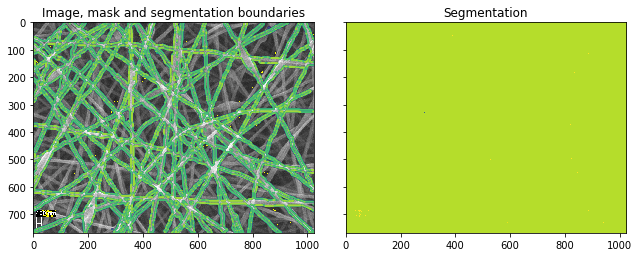

In [8]:
# plot results
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(9, 4))
ax[0].imshow(segmentation.mark_boundaries(image_grey, result, mode="thick"))
ax[0].contour(label_grey)
ax[0].set_title("Image, mask and segmentation boundaries")
ax[1].imshow(result, cmap=plt.cm.gray)
ax[1].set_title("Segmentation")
fig.tight_layout()

In [14]:
!pip install --default-timeout=5000 tensorflow==2.2.0

     |████████████████████████████████| 516.3 MB 3.8 kB/s eta 0:00:015   |█████▎                          | 84.6 MB 34 kB/s eta 3:28:02     |██████▋                         | 107.3 MB 1.7 MB/s eta 0:03:59     |██████████                      | 160.7 MB 1.7 MB/s eta 0:03:31     |██████████▋                     | 171.6 MB 978 kB/s eta 0:05:53     |█████████████████               | 274.6 MB 2.4 MB/s eta 0:01:41     |████████████████████████        | 385.6 MB 2.3 MB/s eta 0:00:58     |███████████████████████████▉    | 448.7 MB 2.1 MB/s eta 0:00:32
     |████████████████████████████████| 2.9 MB 2.6 MB/s eta 0:00:01
     |████████████████████████████████| 26.0 MB 1.2 MB/s eta 0:00:01     |███████████████▎                | 12.4 MB 2.5 MB/s eta 0:00:06
     |████████████████████████████████| 454 kB 2.2 MB/s eta 0:00:01
     |████████████████████████████████| 3.0 MB 1.6 MB/s eta 0:00:01
     |████████████████████████████████| 152 kB 1.9 MB/s eta 0:00:01
ERROR: datashader 0.13.0 requires numba>=

In [18]:
import tensorflow as tf

TypeError: Descriptors cannot not be created directly.
If this call came from a _pb2.py file, your generated code is out of date and must be regenerated with protoc >= 3.19.0.
If you cannot immediately regenerate your protos, some other possible workarounds are:
 1. Downgrade the protobuf package to 3.20.x or lower.
 2. Set PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION=python (but this will use pure-Python parsing and will be much slower).

More information: https://developers.google.com/protocol-buffers/docs/news/2022-05-06#python-updates

In [15]:
!pip install train-unet

  Using cached train_unet-0.0.2-py3-none-any.whl (14 kB)
Processing /home/marilin/.cache/pip/wheels/56/ea/58/ead137b087d9e326852a851351d1debf4ada529b6ac0ec4e8c/docopt-0.6.2-py2.py3-none-any.whl
ERROR: Could not find a version that satisfies the requirement tensorflow==1.13.1 (from train-unet) (from versions: 2.2.0, 2.2.1, 2.2.2, 2.2.3, 2.3.0, 2.3.1, 2.3.2, 2.3.3, 2.3.4, 2.4.0, 2.4.1, 2.4.2, 2.4.3, 2.4.4, 2.5.0, 2.5.1, 2.5.2, 2.5.3, 2.6.0rc0, 2.6.0rc1, 2.6.0rc2, 2.6.0, 2.6.1, 2.6.2, 2.6.3, 2.6.4, 2.6.5, 2.7.0rc0, 2.7.0rc1, 2.7.0, 2.7.1, 2.7.2, 2.7.3, 2.7.4, 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0)
ERROR: No matching distribution found for tensorflow==1.13.1 (from train-unet)


In [11]:
# Configure training target images
import train_unet
from train_unet import *

ModuleNotFoundError: No module named 'train_unet'

In [ ]:
# Configure training target images
import train_unet
from train_unet import *

# set image/mask sizes
IMG_WIDTH = 128
IMG_HEIGHT = 128
IMG_CHANNELS = 3
TRAIN_PATH = "/home/marilin/Documents/ESP/data/unet_test/train"
TEST_PATH = "/home/marilin/Documents/ESP/data/unet_test/validation"
MODEL_OUTPUT_PATH = 'py_model.h5'

# Training and prediction
unet_test = TrainUnet(TRAIN_PATH, TEST_PATH, IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS, MODEL_OUTPUT_PATH) # Create Unet object
X_train, Y_train = unet_test.resize_training_sets() # prep training data
X_test = unet_test.resize_target_sets() # prep Target sets
unet_test.train_illustrate() # exports every 10th training and masked images - illustrates
model_path = unet_test.train_model() # Training
preds_train, preds_val, preds_test = unet_test.load_and_predict() # predict
unet_test.plot_random_comparisons(preds_train, preds_val, preds_test, _save = True) # comparison plots on random images
unet_test.classification_report(ix=25)